<a href="https://colab.research.google.com/github/hamant-jagwan/4_Diwali_sales_analysis-EDA/blob/main/Diwali_sales_analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
data = 'https://raw.githubusercontent.com/hamant-jagwan/Diwali_sales_analysis_EDA/main/Diwali%20Sales%20Data.csv'
df = pd.read_csv(data, encoding= 'ISO-8859-1')

In [3]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [7]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True) 

In [8]:
 # check for null values
 pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# drop null values
df.dropna(inplace = True)

In [10]:
# converting the datatype float to integer
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtype

dtype('int64')

In [11]:
#converting column name without saving the rename 
df.rename(columns ={'Marital_Status': 'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [12]:
df.describe(include = "all")

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
count,1.123900e+04,11239,11239,11239,11239,11239.000000,11239.000000,11239,11239,11239,11239,11239.000000,11239.000000
unique,NaN,1250,2350,2,7,NaN,NaN,16,5,15,18,NaN,NaN
top,NaN,Vishakha,P00265242,F,26-35,NaN,NaN,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,NaN,NaN
freq,NaN,42,53,7832,4541,NaN,NaN,1944,4289,1583,2655,NaN,NaN
mean,1.003004e+06,NaN,NaN,NaN,NaN,35.410357,0.420055,NaN,NaN,NaN,NaN,2.489634,9453.610553
std,1.716039e+03,NaN,NaN,NaN,NaN,12.753866,0.493589,NaN,NaN,NaN,NaN,1.114967,5222.355168
min,1.000001e+06,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,188.000000
25%,1.001492e+06,NaN,NaN,NaN,NaN,27.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,5443.000000
50%,1.003064e+06,NaN,NaN,NaN,NaN,33.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,8109.000000
75%,1.004426e+06,NaN,NaN,NaN,NaN,43.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,12675.000000


In [13]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

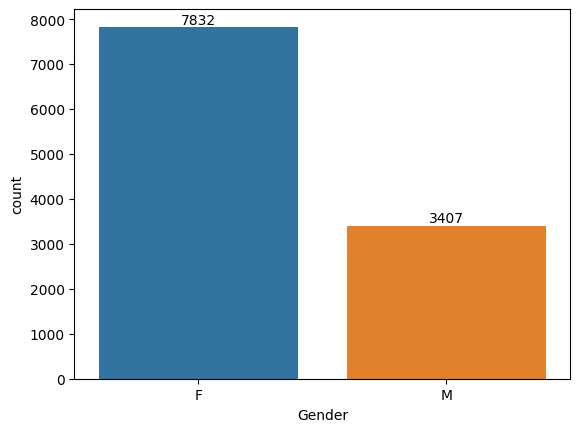

In [14]:
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

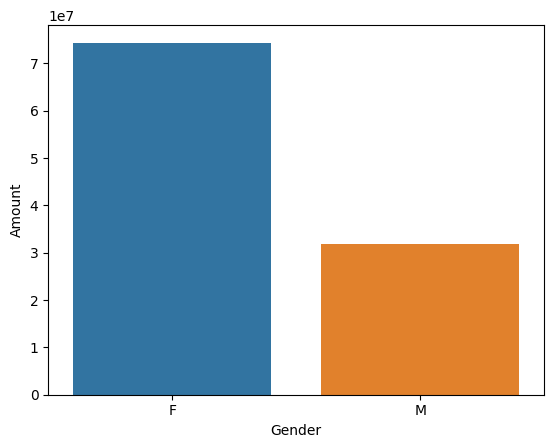

In [15]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending = False)
sns.barplot(x= 'Gender', y='Amount', data = sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.



## Age

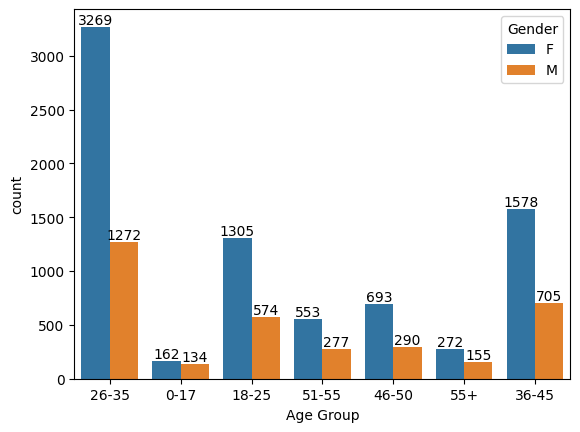

In [16]:
ax = sns.countplot(data = df, x = 'Age Group',hue = 'Gender') #hue divide further in gender
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

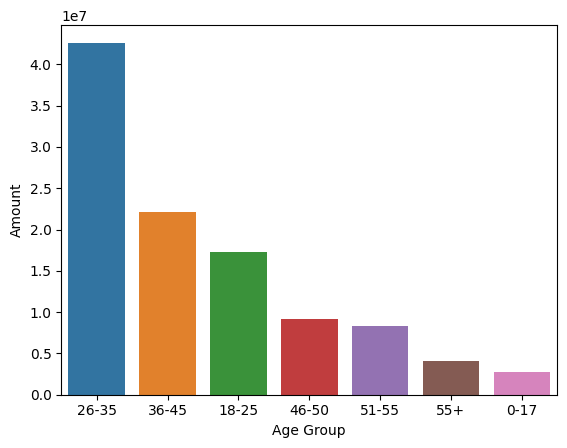

In [17]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

##State

<Axes: xlabel='State', ylabel='Orders'>

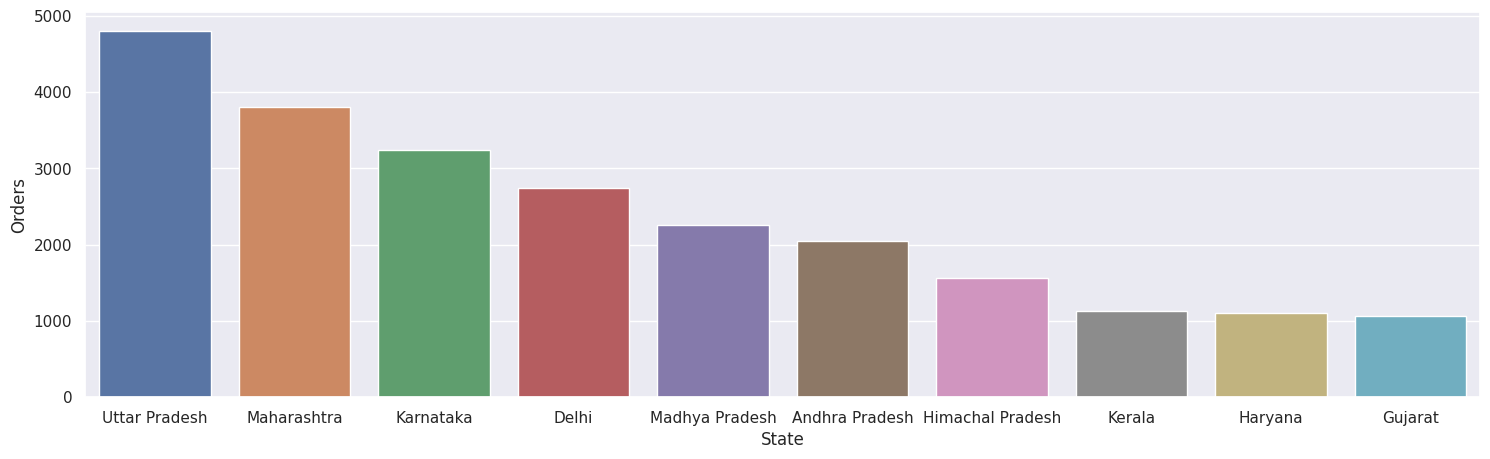

In [18]:
# total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending =False ).head(10)
sns.set(rc = {'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

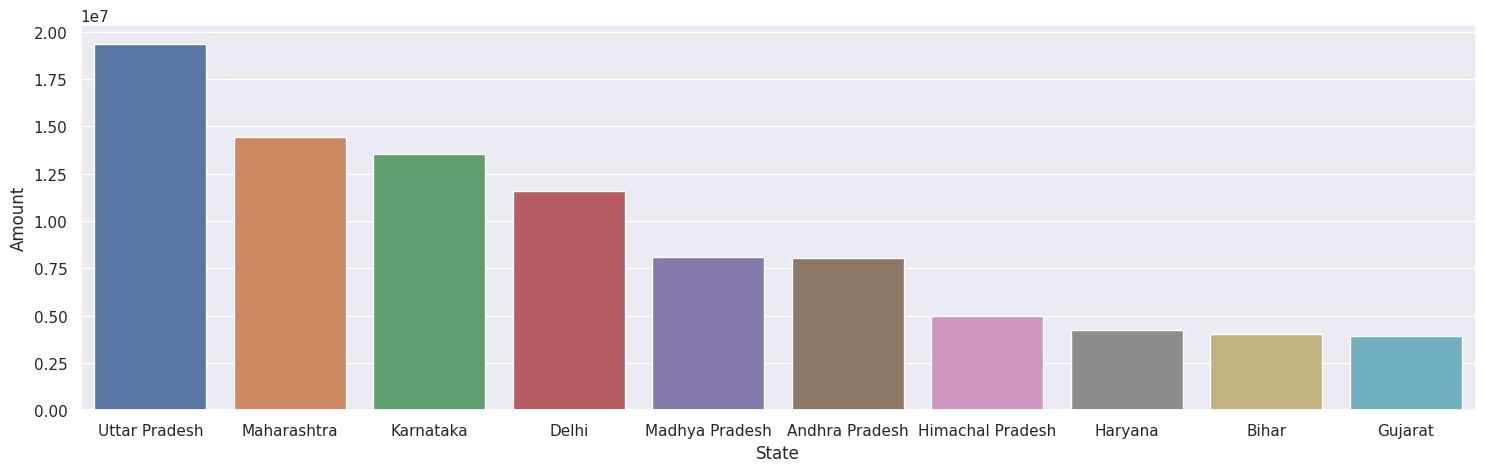

In [19]:
# total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending =False ).head(10)
sns.set(rc = {'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount')

From above graphs we can see that unexpectedly most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively 

##Marital Status

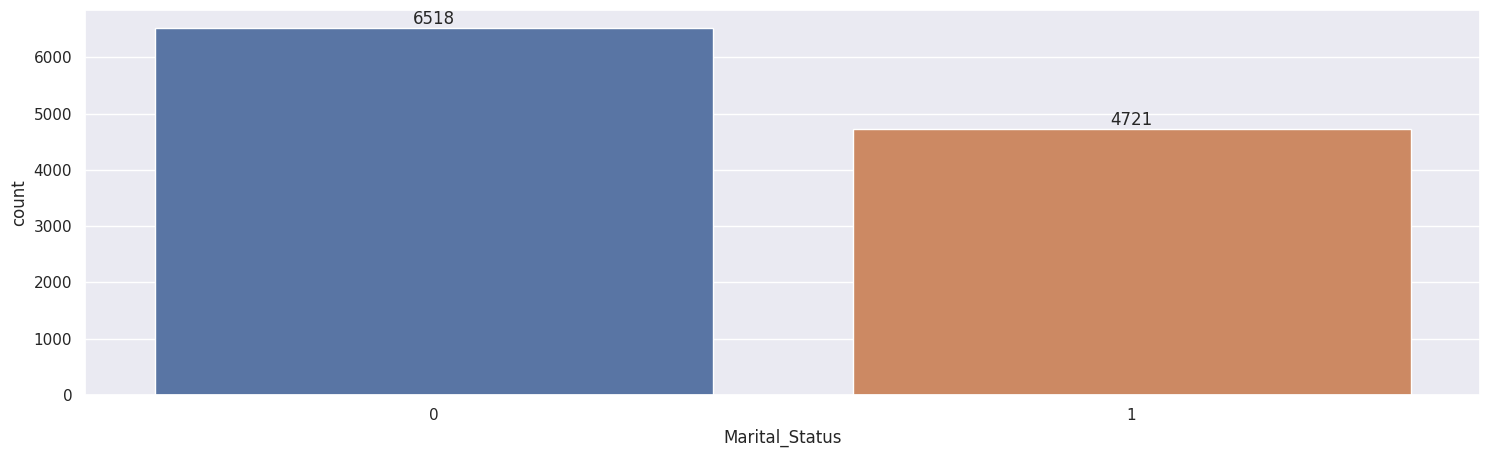

In [20]:
ax = sns.countplot(data = df, x = 'Marital_Status')
sns.set(rc = {'figure.figsize':(8,4)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

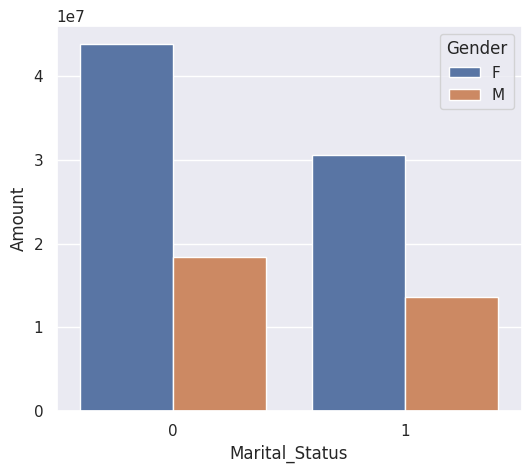

In [21]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)
sns.set(rc = {'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue= 'Gender')

From above graphs we can see that most of the buyers are married(women) and they have high purchasing power

## Occupation

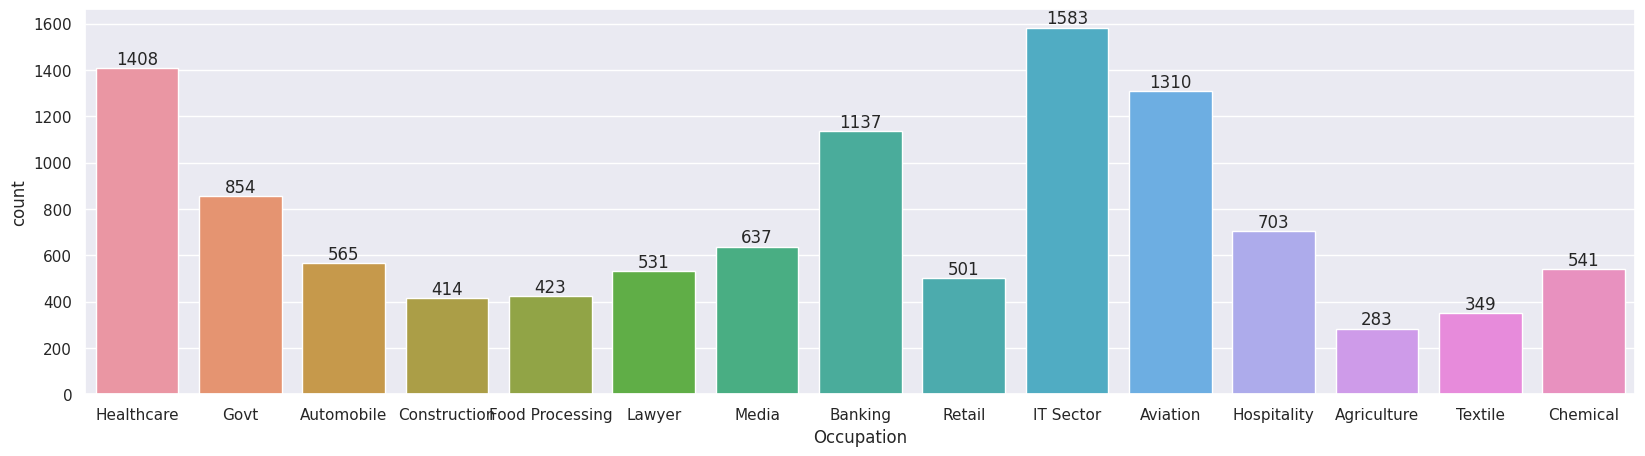

In [22]:
sns.set(rc = {'figure.figsize': (20,5)})
ax = sns.countplot(data = df , x = 'Occupation')
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

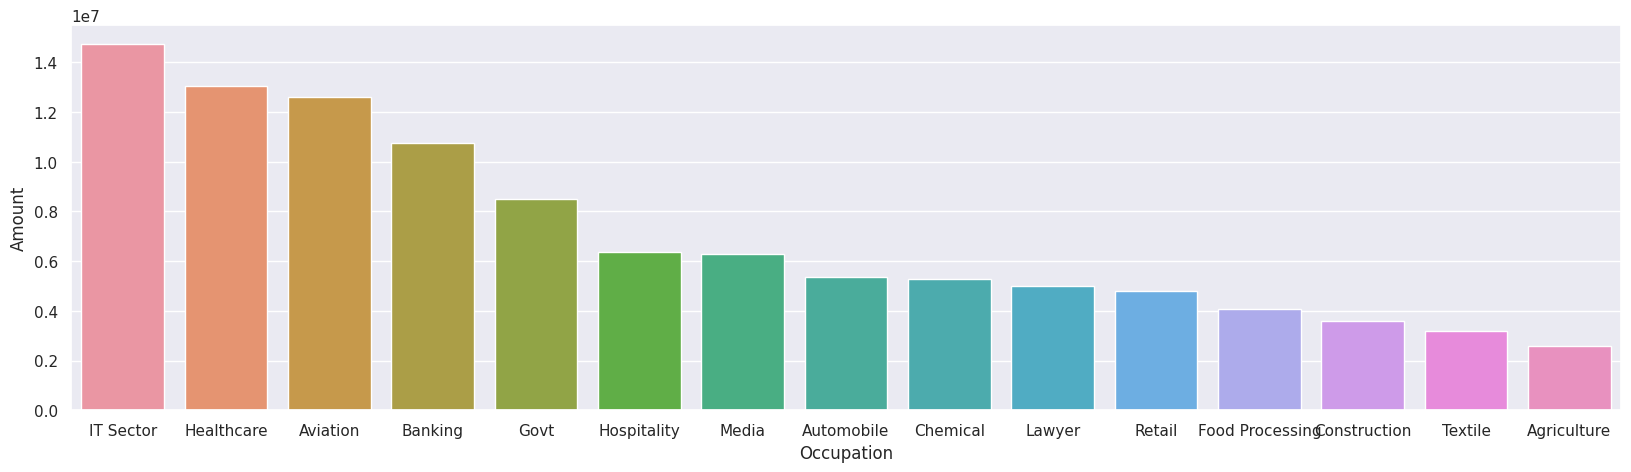

In [23]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending= False)
sns.set(rc = {'figure.figsize': (20,5)})
sns.barplot(data = sales_state, x = 'Occupation', y= 'Amount')


From above graphs we can see that most of the buyers are working in IT, Aviation and Healthcare sector.

## Product Category

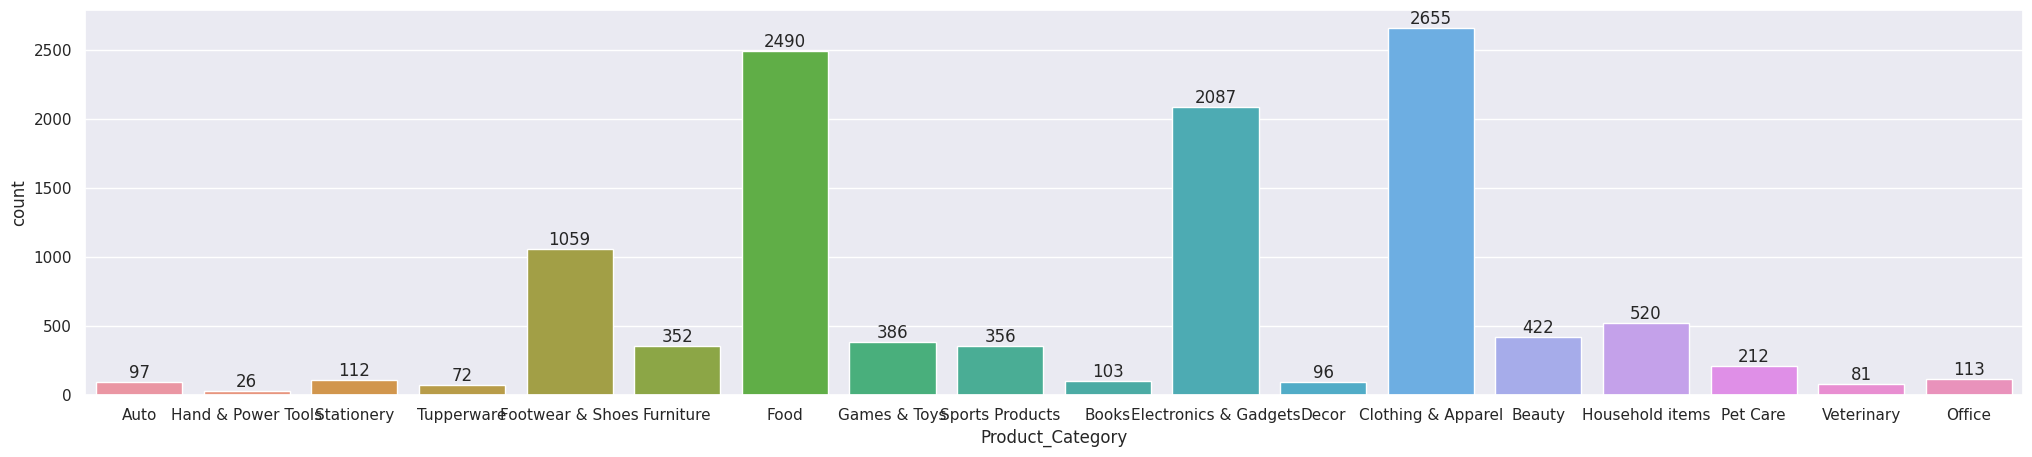

In [25]:
sns.set( rc ={'figure.figsize': (25,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

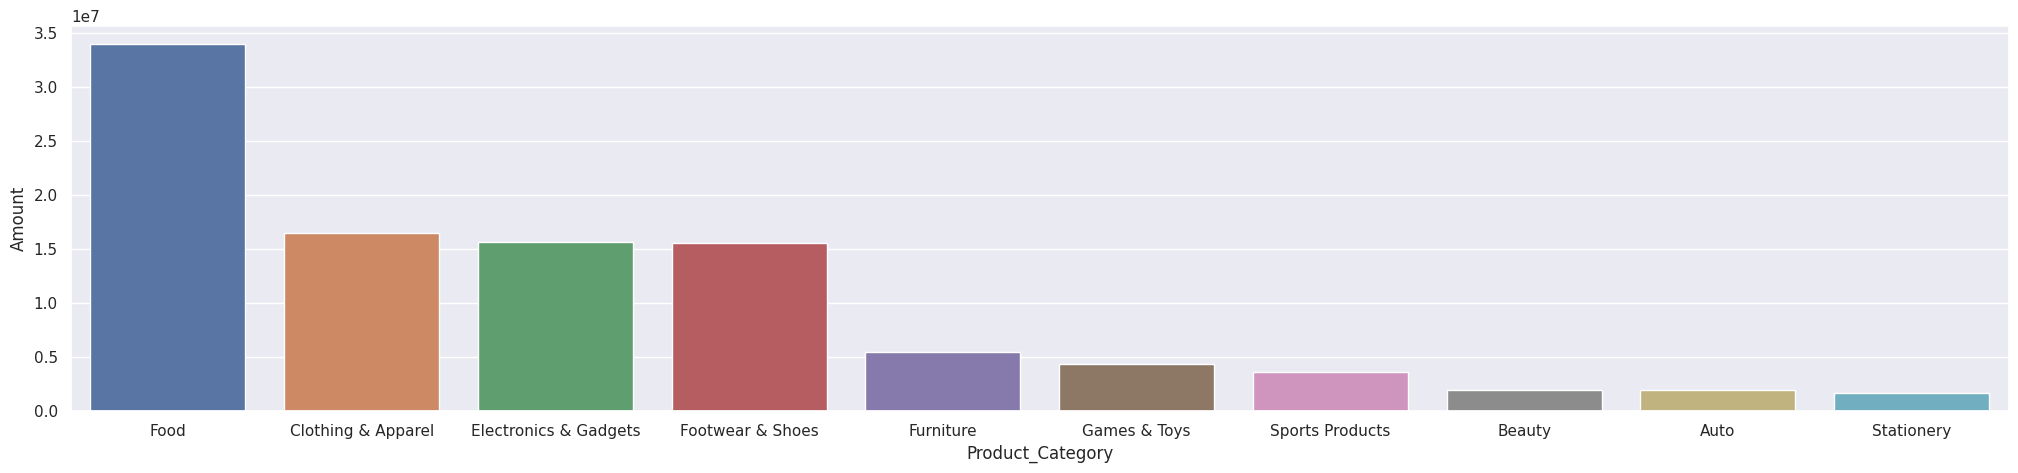

In [31]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize': (25, 5)})
sns.barplot(data = sales_state, x = 'Product_Category', y = 'Amount')

From above graphs we can see that most of the sold products are from Food , clothing & Apparel and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

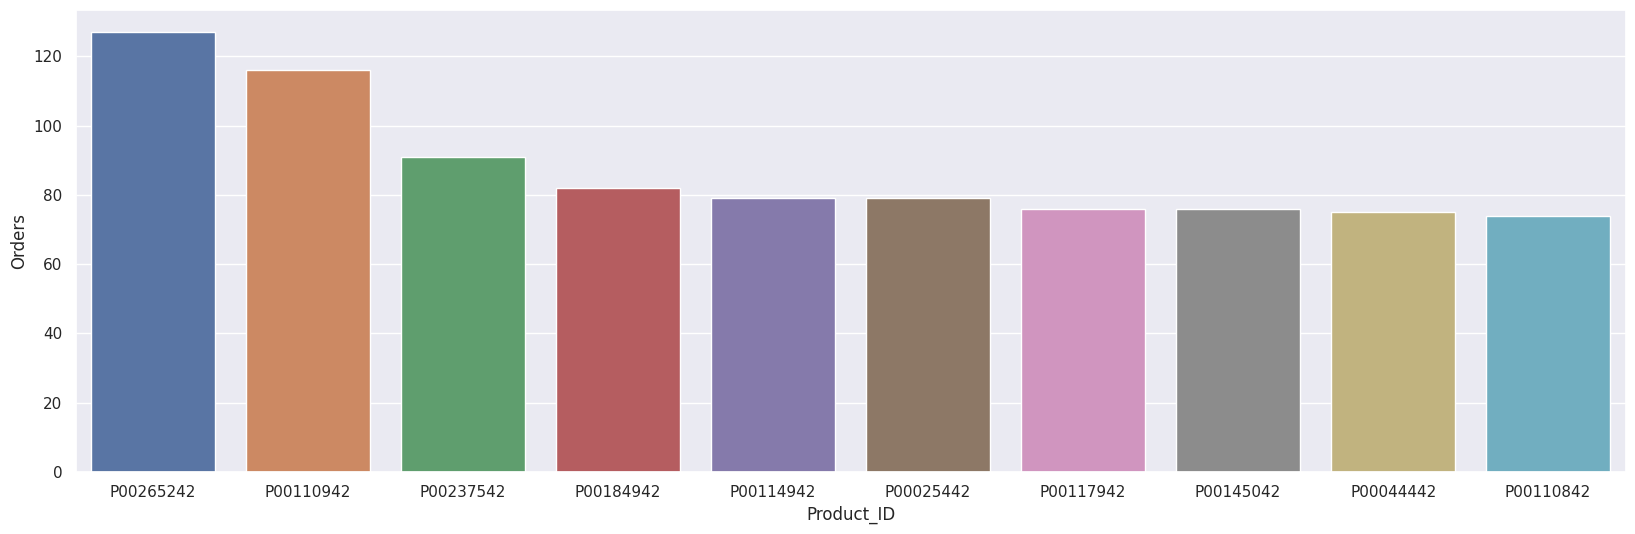

In [32]:
sales_state = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending= False).head(10)
sns.set(rc = {'figure.figsize': (20,6)})
sns.barplot(data = sales_state, x = 'Product_ID', y = 'Orders')

<Axes: xlabel='Product_ID'>

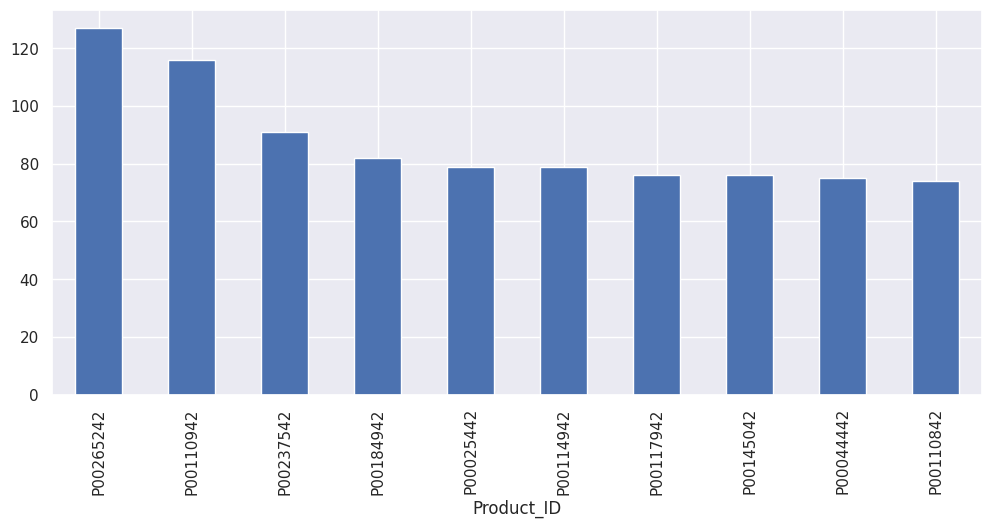

In [35]:
# top 10 most sold products (same thing as above)
fig1, ax1 = plt.subplots(figsize = (12,5))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')

##Conclusion:
Married women age group 26-35 years from UP, Maharastra and Karnataka working in IT, Heathcare and Aviation are more likely to buy products from Food Clothing and Electronics category

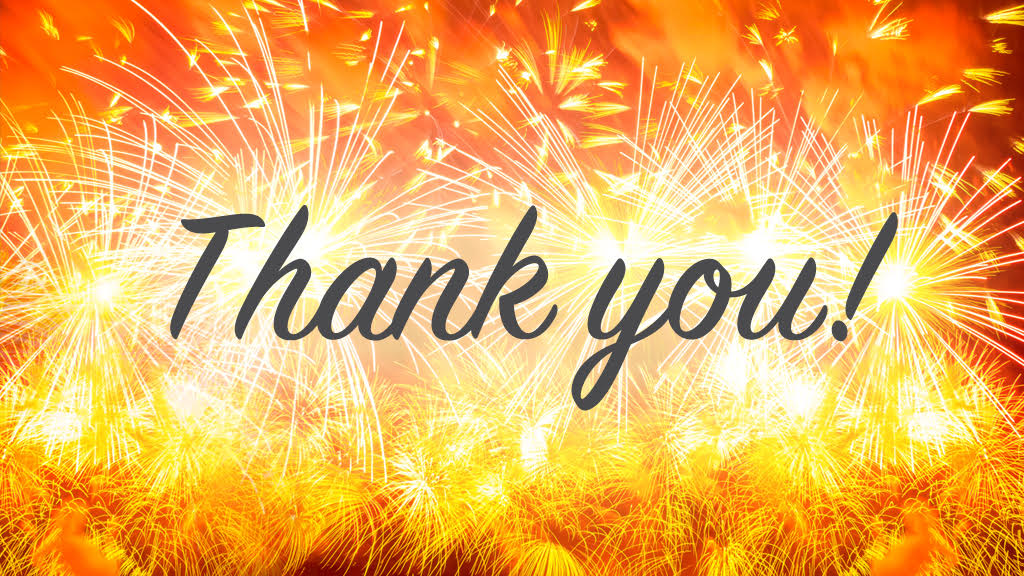